# Grade Distribution at Virginia Tech, 2018-2022

Author: Maelynn Hunter<br/>
Exploring course data from the years I was enrolled in classes at Virginia Tech.

---
Data from Virginia Tech University Datacommons:
* https://udc.vt.edu/irdata/data/courses/grades

---
#### Questions:
* What was the average GPA for each year/semester?
* What was the average GPA for each subject?
* Which course had the most students enrolled?
* Which course had the highest average GPA?
* Which course had the most withdrawals?
* Which instructor taught the most courses?
---

## Preparing the Environment
* Data manipulation: Pandas
* Data visualization: Matplotlib, Seaborn

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# visuals
sns.set_style('darkgrid', {'axes.linewidth': 1, 'axes.edgecolor':'0.15', 'axes.grid':True, 'xtick.bottom': True, 
                           'xtick.top': False, 'ytick.left': True, 'ytick.right': False,})
sns.set_palette('hls', 10)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [4]:
# read CSV data
df = pd.read_csv('Grade Distribution.csv')

## Assessing Data

In [5]:
df.head()

,Academic Year,Term,Subject,Course No.,Course Title,Instructor,GPA,A (%),A- (%),B+ (%),...,C (%),C- (%),D+ (%),D (%),D- (%),F (%),Withdraws,Graded Enrollment,CRN,Credits
0,2018-19,Fall,AOE,4254,Ocean Engineering Laboratory,Alexander,3.34,40.0,20.0,20.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0,5,80350,1
1,2018-19,Fall,BMVS,6094,Board Certification Topics,Rossmeisl,3.74,40.0,40.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,81619,1
2,2018-19,Fall,EDCI,5844,STEM Education Seminar,Wells,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,83585,1
3,2018-19,Fall,EDCI,5844,STEM Education Seminar,Wells,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,83586,1
4,2018-19,Fall,ESM,3064,Mech Behavior Matls Lab,Aidi,3.60,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,84308,1


In [6]:
# removing data I won't use
df.drop(df.loc[:, 'A (%)':'F (%)'], axis=1, inplace=True)
df.drop(df.loc[:, 'CRN':'Credits'], axis=1, inplace=True)
df.drop('Course No.', axis=1, inplace=True)
df.head(3)

,Academic Year,Term,Subject,Course Title,Instructor,GPA,Withdraws,Graded Enrollment
0,2018-19,Fall,AOE,Ocean Engineering Laboratory,Alexander,3.34,0,5
1,2018-19,Fall,BMVS,Board Certification Topics,Rossmeisl,3.74,0,5
2,2018-19,Fall,EDCI,STEM Education Seminar,Wells,4.00,0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35093 entries, 0 to 35092
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Academic Year      35093 non-null  object 
 1   Term               35093 non-null  object 
 2   Subject            35093 non-null  object 
 3   Course Title       35093 non-null  object 
 4   Instructor         35093 non-null  object 
 5   GPA                35093 non-null  float64
 6   Withdraws          35093 non-null  int64  
 7   Graded Enrollment  35093 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


In [8]:
df.describe()

,GPA,Withdraws,Graded Enrollment
count,35093.000000,35093.000000,35093.000000
mean,3.442267,0.781039,33.346422
std,0.460107,3.015621,61.973195
min,1.280000,0.000000,5.000000
25%,3.160000,0.000000,13.000000
50%,3.540000,0.000000,21.000000
75%,3.810000,0.000000,36.000000
max,4.000000,136.000000,4135.000000


From the years 2018-2022, the average GPA at VT was 3.44 with a standard deviation of 0.46 points. There was an average of 33 students in each class, and on average, less than one student dropped each course.

## GPA Per Year/Semester
* What was the average GPA for each year/semester?

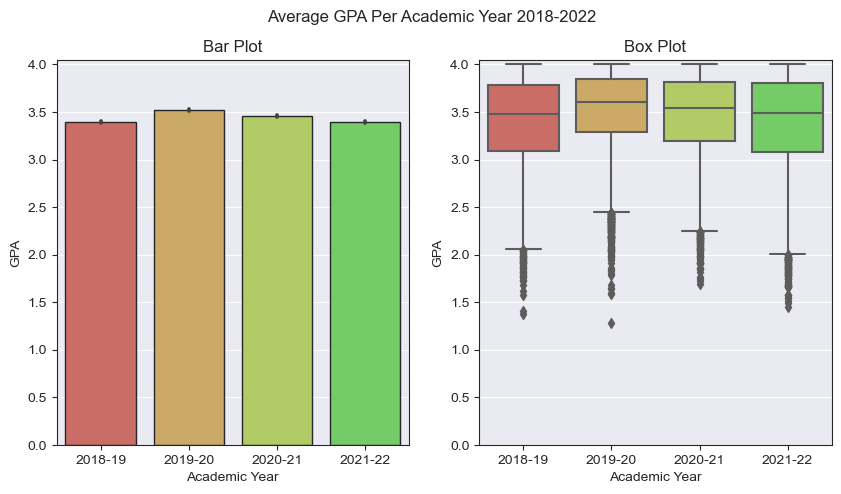

In [9]:
# creating plot
fig,axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Average GPA Per Academic Year 2018-2022')

# barplot
ax1 = sns.barplot(ax=axes[0], data=df, x='Academic Year', y='GPA', edgecolor='0.15')
ax1.set_ylim([0, 4.05])
ax1.set_title('Bar Plot')

# boxplot
ax2 = sns.boxplot(ax=axes[1], data=df, x='Academic Year', y='GPA')
ax2.set_ylim([0, 4.05])
ax2.set_title('Box Plot');

On average, student GPAs were higher during the 2019-2020 academic school year. Let's look at each semester:

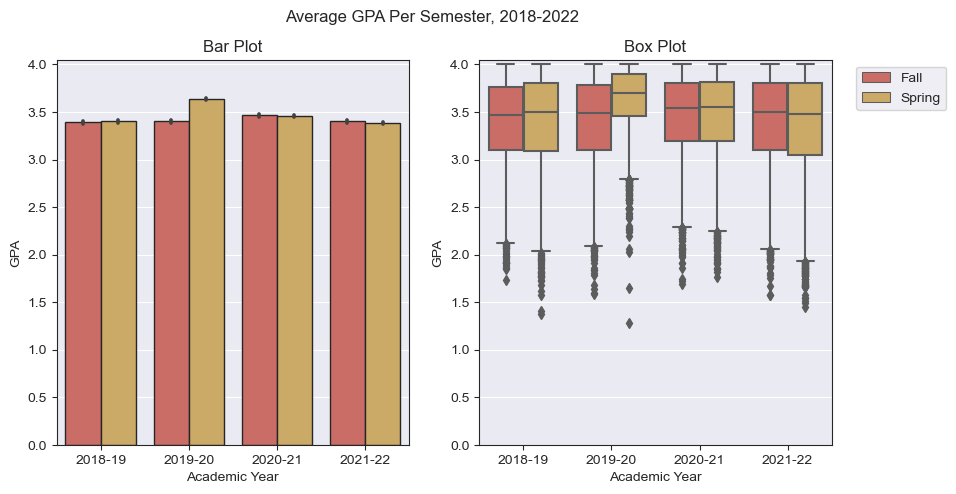

In [10]:
# creating plot
fig,axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Average GPA Per Semester, 2018-2022')

# barplot
ax1 = sns.barplot(ax=axes[0], data=df, x='Academic Year', y='GPA', hue='Term', edgecolor='0.15')
ax1.set_ylim([0, 4.05])
ax1.set_title('Bar Plot')
ax1.get_legend().remove()

# boxplot
ax2 = sns.boxplot(ax=axes[1], data=df, x='Academic Year', y='GPA', hue='Term')
ax2.set_ylim([0, 4.05])
ax2.set_title('Box Plot');

# legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

Spring 2020, the semester classes ended online due to Covid, was the semester with the highest average GPA. This is likely because of the university's Credit/NoCredit policy that semester, where students could decide if they wanted a course to factor into their GPA.
* https://www.registrar.vt.edu/content/registrar_vt_edu/en/COVID-19-Grade-Mode.html#:~:text=A%20grade%20of%20a%20CC,policy%20has%20not%20been%20altered.

## GPA by Subject
* What was the average GPA for each subject?

In [11]:
# number of unique subjects
df['Subject'].nunique()

143

There are 143 total unique subjects. Let's look at the 20 most common subjects:

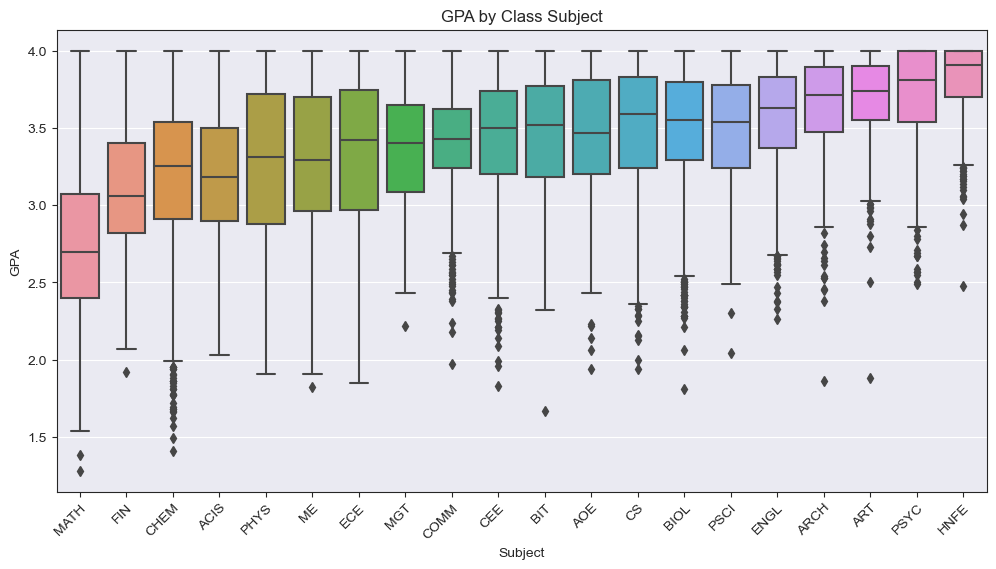

In [12]:
# the 20 most common subjects
top_20 = df['Subject'].value_counts().head(20).index.tolist()

# sorting by GPA
plot_order = df[df['Subject'].isin(top_20)].groupby('Subject').mean('GPA').sort_values('GPA').index

# creating plot
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df, x=df[df['Subject'].isin(top_20)]['Subject'], y='GPA', order=plot_order)

# labels
ax.set(title='GPA by Class Subject')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');

The subject with the highest average GPA is Human Nutrition, Food, and Exercise.<br/>
The subject with the lowest average GPA is Math, probably because math is hard :(</br>
Let's take a closer look at the Math classes:

In [13]:
# number of unique math classes
len(df[df['Subject'] == 'MATH']['Course Title'].unique().tolist())

100

There are 100 different Math classes. Let's look at the top 20:

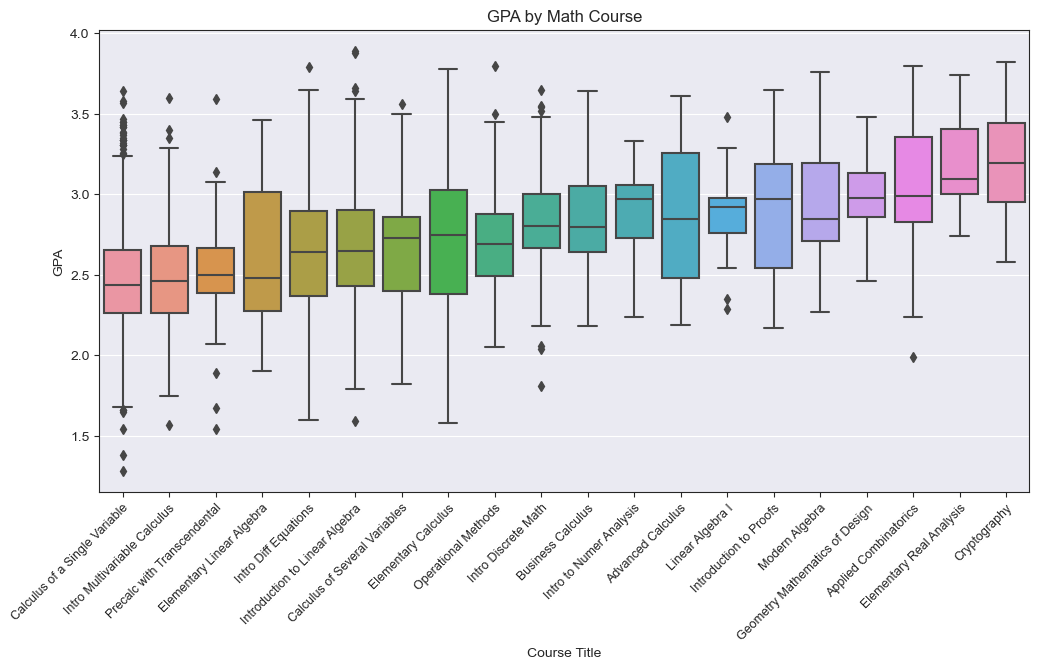

In [14]:
# top 20 most common math courses
math_20 = df[df['Subject'] == 'MATH']['Course Title'].value_counts().head(20).index.tolist()

# sorting by GPA
plot_order = df[df['Course Title'].isin(math_20)].groupby('Course Title').mean('GPA').sort_values('GPA').index

# creating plot
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df, x=df[df['Course Title'].isin(math_20)]['Course Title'], y='GPA', order=plot_order)

# labels
ax.set(title='GPA by Math Course')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=9);

The Math course with the lowest average GPA was Calculus of a Single Variable, which is the introductory calculus course for math majors. The Math course with the highest average GPA was Cryptography.

# Courses
* Which courses had the most students enrolled?
* Which courses had the highest average GPA?
* Which courses had the lowest average GPA?
* Which courses had the most withdrawals?

<font size="5">Which courses had the most students enrolled?</font>

In [15]:
# course with most total students enrolled
df.groupby('Course Title').sum('Graded Enrollment').sort_values(by=['Graded '
                                                                    'Enrollment'], ascending=False)['Graded Enrollment'].head(1)

Course Title
First-Year Writing    22193
Name: Graded Enrollment, dtype: int64

The course with the most students enrolled over 2018-2022 was First-Year Writing, with 22,193 students over 4 years.

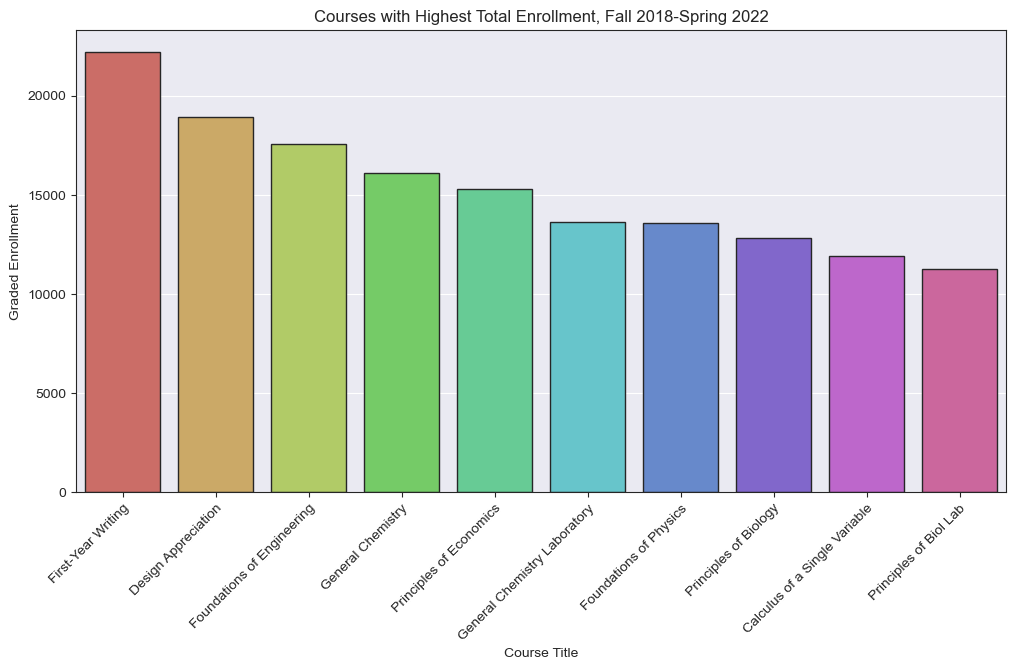

In [16]:
# total enrollment of the top 10 classes with the highest enrollment from 2018-2022
enrollmentdf = df.groupby('Course Title').sum('Graded Enrollment').sort_values(by=['Graded Enrollment'],
                                                                               ascending=False).head(10)
# creating plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data = enrollmentdf, x=enrollmentdf.index, y='Graded Enrollment', edgecolor='0.15')
ax.set_title('Courses with Highest Total Enrollment, Fall 2018-Spring 2022')

# labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');

Let's look at the course with the highest enrollment during a single semester:

In [17]:
# course with highest enrollment
df[df['Graded Enrollment'] == df['Graded Enrollment'].max()]

,Academic Year,Term,Subject,Course Title,Instructor,GPA,Withdraws,Graded Enrollment
35092,2021-22,Fall,ITDS,Design Appreciation,Tew,3.5,120,4135


The course with the most students enrolled at one time was Design Appreciation, with 4135 students during Fall 2021.

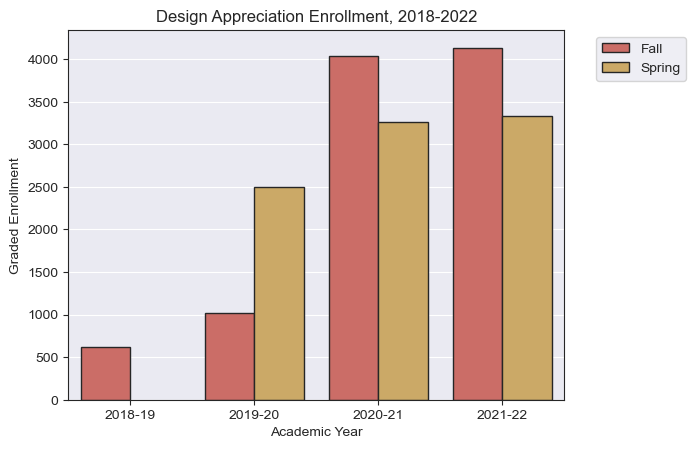

In [18]:
# organizing data
designdf = df[df['Course Title'] == 'Design Appreciation']

# creating plot
sns.barplot(data=designdf, x='Academic Year', y='Graded Enrollment', hue='Term', edgecolor='0.15').set(title=
                                                                        'Design Appreciation Enrollment, 2018-2022')
# legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

The number of students enrolled in Design Appreciation skyrocketed in 2020, when a Spring section was offered for the course.

---

<font size="5">Which courses had the highest GPA?</font>

In [19]:
# top 10 courses with highest GPA
df[['Term','Academic Year','Course Title','GPA']].sort_values(by=['GPA'], ascending=False).head(10)

,Term,Academic Year,Course Title,GPA
1773,Spring,2018-19,Elctrnc Circuits Lab II,4.0
13667,Spring,2019-20,Studio Art for Non-Majors,4.0
6006,Fall,2021-22,Lab in Social Psyc,4.0
6004,Fall,2021-22,Independent Study,4.0
17993,Fall,2021-22,Grant Writing and Ethics,4.0
15657,Spring,2020-21,Design-Related Media,4.0
22885,Spring,2021-22,Exploring Clinical Neurosci,4.0
22874,Spring,2021-22,Pub Hlth Integrative Lrng Exp,4.0
2323,Spring,2020-21,TS: Water Interface IGEP,4.0
13610,Spring,2019-20,Portfolio,4.0


At least the top 10 courses by GPA all have an average GPA of 4.0, so how many courses have an average GPA of 4.0?

In [20]:
# number of courses with 4.0 average GPA
len(df[df['GPA']==df['GPA'].max()])

3259

There are 3259 courses with an average GPA of 4.0! A lot of them have the abbreviation SS and TS, which stand for Special Study and Topics Course, respectively.

---

<font size="5">Which courses had the lowest GPA?</font>

First, let's look at classes with the lowest average GPA:

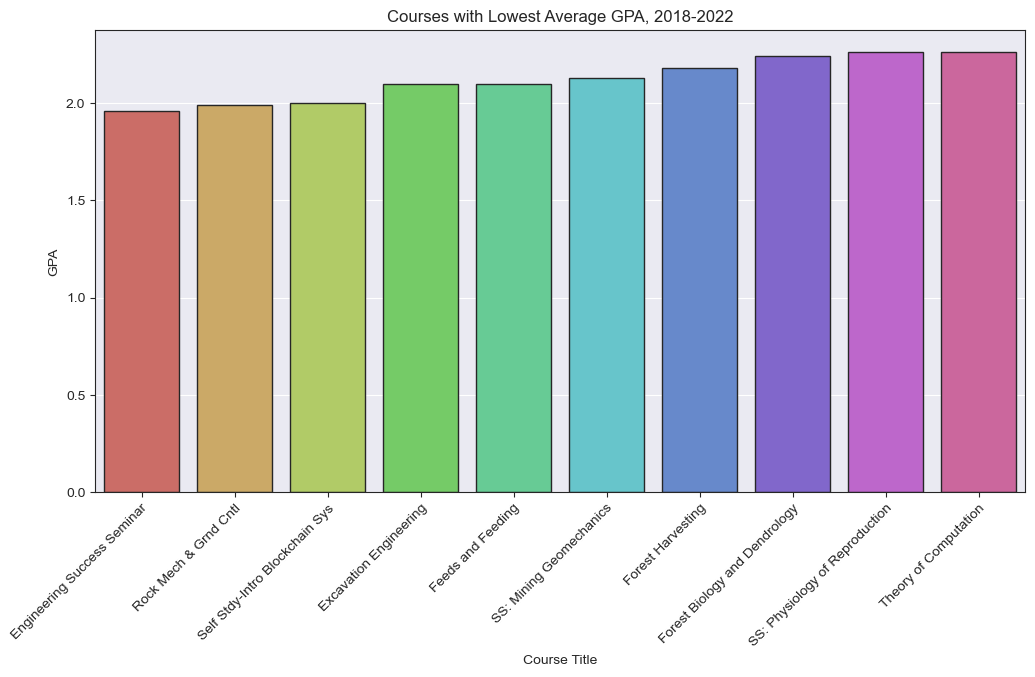

In [21]:
# lowest average GPA of courses
GPAdf = df.groupby('Course Title').mean('GPA').round(2).sort_values(by=['GPA'], ascending=True).head(10)

# creating plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=GPAdf, x=GPAdf.index, y='GPA', edgecolor='0.15')
ax.set_title('Courses with Lowest Average GPA, 2018-2022')

# labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');

The course with the lowest average GPA from 2018-2022 is the Engineering Success Seminar.<br/>Next, let's look at the course with the lowest GPA during a specific semester:

In [22]:
# course with lowest semester GPA
df[df['GPA'] == df['GPA'].min()]

,Academic Year,Term,Subject,Course Title,Instructor,GPA,Withdraws,Graded Enrollment
7015,2019-20,Spring,MATH,Calculus of a Single Variable,Gamble,1.28,1,6


The course with the lowest overall GPA was Calculus of a Single Variable during Spring 2020. <br/> This may be because there were only 6 students in the course; three of them failed, meaning half of the class had a student GPA of 0.0.

In [23]:
df[['Term','Academic Year','Course Title','GPA','Graded Enrollment']].sort_values(by='GPA').head(10)

,Term,Academic Year,Course Title,GPA,Graded Enrollment
7015,Spring,2019-20,Calculus of a Single Variable,1.28,6
22049,Spring,2018-19,Calculus of a Single Variable,1.38,19
22604,Spring,2018-19,General Chemistry,1.41,27
15968,Spring,2021-22,Dynamics,1.45,17
19157,Spring,2021-22,General Chemistry,1.49,20
8586,Spring,2021-22,Engineering Cultures,1.51,9
26679,Spring,2021-22,Calculus of a Single Variable,1.54,28
28124,Spring,2021-22,Precalc with Transcendental,1.54,42
24019,Fall,2021-22,Dynamics,1.57,30
20105,Spring,2018-19,Intro Multivariable Calculus,1.57,22


All of the top ten classes for lowest semester GPA have an enrollment below 45; the small sample size may skew the results negatively.

---

<font size="5">Which courses had the most withdrawals?</font>

In [24]:
# course with highest number of withdrawals
df[df['Withdraws'] == df['Withdraws'].max()]

,Academic Year,Term,Subject,Course Title,Instructor,GPA,Withdraws,Graded Enrollment
34899,2021-22,Fall,CS,Intro to Software Design,Edwards,2.35,136,267


The course with the highest number of withdrawals in a single semester is Intro to Software Design in Fall 2021. <br/>Let's look at total withdrawals over the four-year period:

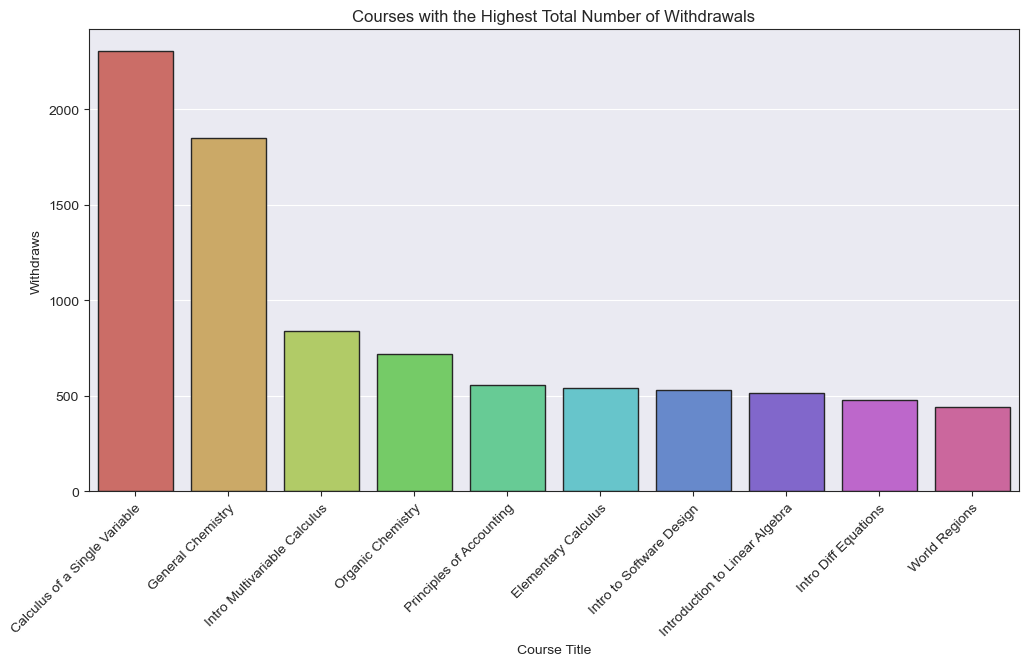

In [25]:
# top 10 courses with highest total number of withdrawals
withdrawdf = df.groupby('Course Title').sum('Withdraws').sort_values(by=['Withdraws'], ascending=False).head(10)

# creating plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=withdrawdf, x=withdrawdf.index, y='Withdraws', edgecolor='0.15')
ax.set_title('Courses with the Highest Total Number of Withdrawals')

# labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=10);

The course with the highest total number of withdrawals during the four-year period is Calculus of a Single Variable, followed by General Chemistry. These results align with the earlier results that show that Calculus of a Single Variable is the Math course with the lowest average GPA.

# Instructors
* Which instructor taught the most courses?

In [26]:
# instructor with the most courses
df['Instructor'].value_counts().head(1)

Long    816
Name: Instructor, dtype: int64

The instructor who taught the most classes in the four-year period was Long, with 816 classes. What classes did Long teach?

In [27]:
# list of all classes that Long taught from 2018-2022
df[df['Instructor']=='Long']['Course Title'].unique().tolist()

['General Chemistry Laboratory',
 'Survey of Chemical Literature',
 'Presentation Skills',
 'Majors Analytical Lab',
 'General Chemistry Lab',
 'Laboratory in Polymer Science',
 'Integrated Science Lab II',
 'Undergraduate Research',
 'MACR Fundament Lab I and II',
 'Integrated Science Lab I',
 'Integrated Sceince Lab I',
 'Engineering Design & Econ',
 'Engr Design & Econ',
 'Integrated Science I',
 'Contemporary Physics',
 'Integrated Science II',
 'General Chemistry',
 'Mechanical Engineering Lab']

Dr. Long is the instructor for a lot of research, chemistry, and lab courses. A lot of these courses have many different times/sections for students to take, which is likely why the number of classes is so high.<br/> How many of each of these courses does he teach?

In [28]:
# counts of Long's courses from 2018-2022
long_courses_count = df[df['Instructor']=='Long']['Course Title'].value_counts()

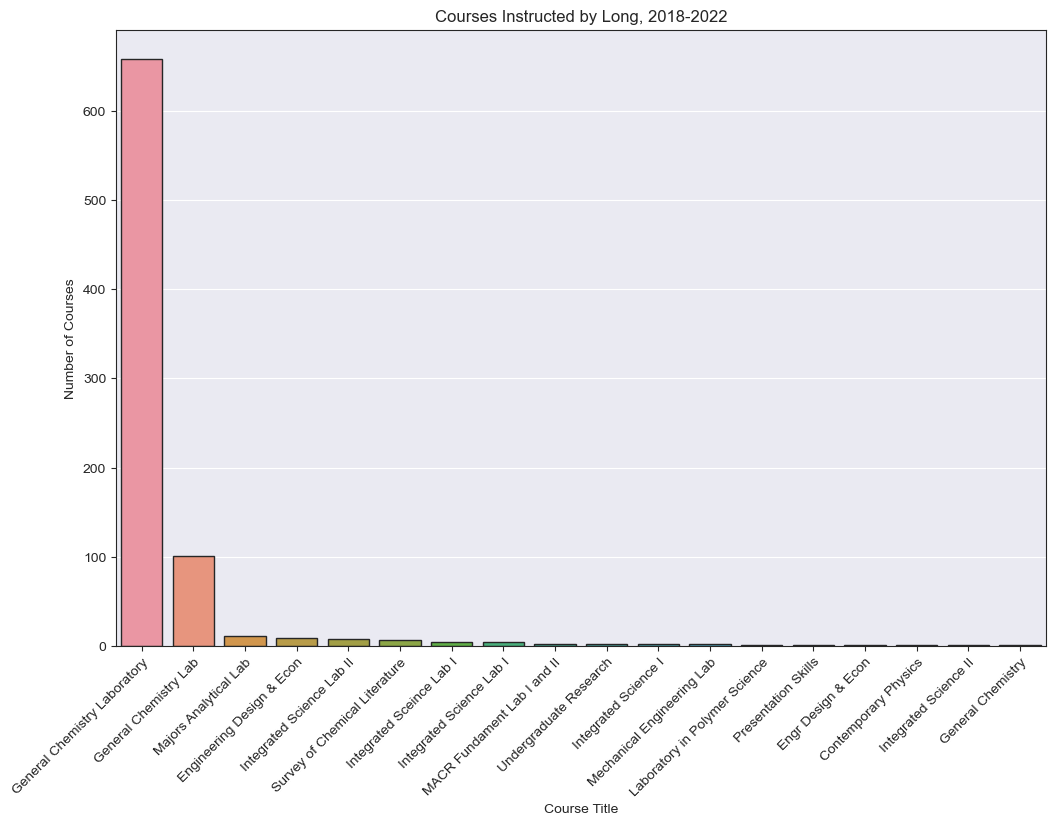

In [31]:
# creating plot
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df, x=long_courses_count.index, y=long_courses_count, edgecolor='0.15')
ax.set_title('Courses Instructed by Long, 2018-2022')

# labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
plt.xlabel('Course Title')
plt.ylabel('Number of Courses');

The majority of Dr. Long's courses are General Chemistry Laboratories. He instructed over 650 of them in the four-year period from 2018-2022.